```{currentmodule} tskit
```


(sec_identity)=

# Identity by descent

The {meth}`.TreeSequence.ibd_segments` method allows us to compute
segments of identity by descent.

:::{note}
This documentation page is preliminary
:::

:::{todo}
Relate the concept of identity by descent to the MRCA spans in the tree sequence.
:::

## Examples

Let's take a simple tree sequence to illustrate the {meth}`.TreeSequence.ibd_segments`
method and associated {ref}`sec_python_api_reference_identity`:

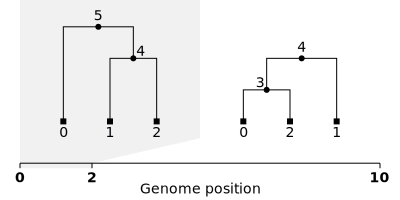

In [1]:
import tskit
import io
from IPython.display import SVG

nodes = io.StringIO(
    """\
    id      is_sample   time
    0       1           0
    1       1           0
    2       1           0
    3       0           1
    4       0           2
    5       0           3
    """
)
edges = io.StringIO(
    """\
    left    right   parent  child
    2     10     3       0
    2     10     3       2
    0     10     4       1
    0     2      4       2
    2     10     4       3
    0     2      5       0
    0     2      5       4
    """
)
ts = tskit.load_text(nodes=nodes, edges=edges, strict=False)

SVG(ts.draw_svg())

### Definition

A pair of nodes ``(u, v)`` has an IBD segment with a left and right
coordinate ``[left, right)`` and ancestral node ``a`` iff the most
recent common ancestor of the segment ``[left, right)`` in nodes ``u``
and ``v`` is ``a``, and the segment has been inherited along the same
genealogical path (ie. it has not been broken by recombination). The
segments returned are the longest possible ones.

Consider the IBD segments that we get from our example tree sequence:

In [2]:
segments = ts.ibd_segments(store_segments=True)
for pair, segment_list in segments.items():
    print(pair, list(segment_list))

(0, 1) [IdentitySegment(left=2.0, right=10.0, node=4), IdentitySegment(left=0.0, right=2.0, node=5)]
(0, 2) [IdentitySegment(left=2.0, right=10.0, node=3), IdentitySegment(left=0.0, right=2.0, node=5)]
(1, 2) [IdentitySegment(left=0.0, right=2.0, node=4), IdentitySegment(left=2.0, right=10.0, node=4)]


Each of the sample pairs (0, 1), (0, 2) and (1, 2) is associated with
two IBD segments, representing the different paths from these sample
pairs to their common ancestor. Note in particular that (1, 2) has
**two** IBD segments rather than one: even though the MRCA is
4 in both cases, the paths from the samples to the MRCA are different
in the left and right trees.


### Data structures

The result of calling {meth}`.TreeSequence.ibd_segments` is an
{class}`.IdentitySegments` class:

In [3]:
segments = ts.ibd_segments()
print(segments)

╔════════════════════╗
║IdentitySegments    ║
╠══════════════╤═════╣
║Parameters:   │     ║
║max_time      │  inf║
║min_span      │    0║
║store_pairs   │False║
║store_segments│False║
║Results:      │     ║
║num_segments  │    6║
║total_span    │ 30.0║
╚══════════════╧═════╝



By default this class only stores the high-level summaries of the
IBD segments discovered. As we can see in this example, we have a
total of six segments and
the total span (i.e., the sum lengths of the genomic intervals spanned
by IBD segments) is 30.

If required, we can get more detailed information about particular
segment pairs and the actual segments using the ``store_pairs``
and ``store_segments`` arguments.

:::{warning}
Only use the ``store_pairs`` and ``store_segments`` arguments if you
really need this information! The number of IBD segments can be
very large and storing them all requires a lot of memory. It is
also much faster to just compute the overall summaries, without
needing to store the actual lists.
:::

In [4]:
segments = ts.ibd_segments(store_pairs=True)
for pair, value in segments.items():
    print(pair, "::", value)

(0, 1) :: IdentitySegmentList(num_segments=2, total_span=10.0)
(0, 2) :: IdentitySegmentList(num_segments=2, total_span=10.0)
(1, 2) :: IdentitySegmentList(num_segments=2, total_span=10.0)


Now we can see the more detailed breakdown of how the identity segments
are distributed among the sample pairs. The {class}`.IdentitySegments`
class behaves like a dictionary, such that ``segments[(a, b)]`` will return
the {class}`.IdentitySegmentList` instance for that pair of samples:

In [5]:
seglist = segments[(0, 1)]
print(seglist)

IdentitySegmentList(num_segments=2, total_span=10.0)


If we want to access the detailed information about the actual
identity segments, we must use the ``store_segments`` argument:

In [6]:
segments = ts.ibd_segments(store_pairs=True, store_segments=True)
segments[(0, 1)]

IdentitySegmentList([IdentitySegment(left=2.0, right=10.0, node=4), IdentitySegment(left=0.0, right=2.0, node=5)])

The {class}`.IdentitySegmentList` behaves like a Python list,
where each element is an instance of {class}`.IdentitySegment`.

:::{warning}
The order of segments in an {class}`.IdentitySegmentList`
is arbitrary, and may change in future versions.
:::


```{eval-rst}
.. todo:: More examples using the other bits of the IdentitySegments
    API here
```

### Controlling the sample sets

By default we get the IBD segments between all pairs of
{ref}`sample<sec_data_model_definitions_sample>` nodes.

#### IBD within a sample set
We can reduce this to pairs within a specific set using the
``within`` argument:


```{eval-rst}
.. todo:: More detail and better examples here.
```

In [7]:
segments = ts.ibd_segments(within=[0, 2], store_pairs=True)
print(list(segments.keys()))

[(0, 2)]


#### IBD between sample sets

We can also compute IBD **between** sample sets:

In [8]:
segments = ts.ibd_segments(between=[[0,1], [2]], store_pairs=True)
print(list(segments.keys()))

[(0, 2), (1, 2)]


:::{seealso}
See the {meth}`.TreeSequence.ibd_segments` documentation for
more details.
:::

### Constraints on the segments

The ``max_time`` and ``min_span`` arguments allow us to constrain the
segments that we consider.

```{eval-rst}
.. todo:: Add examples for these arguments.
```